In [74]:
import pandas as pd

set_config(transform_output="pandas")

Explanation of some columns:

- **ADR (Average Daily Rate):** This is a numerical column representing the average revenue earned per occupied room per day. Higher values indicate more expensive stays.
- **Lead Time:** This represents the number of days between the booking date and the arrival date. Higher values suggest early bookings, while lower values indicate last-minute reservations.
- **Customer Type:** This categorical variable describes the type of booking:
  - *Transient*: Individual booking, not part of a group or contract.
  - *Contract*: Booking as part of a long-term contract.
  - *Transient-Party*: Individuals booking together, such as families or friends.
  - *Group*: Group booking, often related to corporate or event reservations.
- **Agent:** A numerical identifier for the travel agency or agent that made the booking. If missing, it means no agent was involved.
- **Company:** A numerical identifier for corporate bookings. If missing, the booking is not associated with a company.
- **Meal:** This represents the meal plan included with the booking:
  - *BB*: Bed & Breakfast.
  - *FB*: Full Board (includes all meals).
  - *HB*: Half Board (breakfast and one other meal).
  - *SC*: Self-Catering (no meals included).
  - *Undefined*: No specific meal plan assigned.

In [75]:
df = pd.read_csv("hotel_bookings.csv")

In [76]:
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [77]:
df.isnull().sum().sort_values(ascending=False)

company                           112593
agent                              16340
country                              488
children                               4
arrival_date_month                     0
arrival_date_week_number               0
hotel                                  0
is_canceled                            0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
adults                                 0
stays_in_week_nights                   0
babies                                 0
meal                                   0
lead_time                              0
arrival_date_year                      0
distribution_channel                   0
market_segment                         0
previous_bookings_not_canceled         0
is_repeated_guest                      0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
previous_cancellations                 0
deposit_type    

In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [79]:
len(df.columns)

32

In [80]:
df.head().iloc[:,:10]

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults
0,Resort Hotel,0,342,2015,July,27,1,0,0,2
1,Resort Hotel,0,737,2015,July,27,1,0,0,2
2,Resort Hotel,0,7,2015,July,27,1,0,1,1
3,Resort Hotel,0,13,2015,July,27,1,0,1,1
4,Resort Hotel,0,14,2015,July,27,1,0,2,2


In [81]:
df.head().iloc[:,10:20]

,children,babies,meal,country,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,reserved_room_type
0,0.0,0,BB,PRT,Direct,Direct,0,0,0,C
1,0.0,0,BB,PRT,Direct,Direct,0,0,0,C
2,0.0,0,BB,GBR,Direct,Direct,0,0,0,A
3,0.0,0,BB,GBR,Corporate,Corporate,0,0,0,A
4,0.0,0,BB,GBR,Online TA,TA/TO,0,0,0,A


In [82]:
df.head().iloc[:,20:32]

,assigned_room_type,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,C,3,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,C,4,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,C,0,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,A,0,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,A,0,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [83]:
df["hotel"].unique()

array(['Resort Hotel', 'City Hotel'], dtype=object)

In [84]:
df["children"].value_counts()

children
0.0     110796
1.0       4861
2.0       3652
3.0         76
10.0         1
Name: count, dtype: int64

In [85]:
df["deposit_type"].value_counts()

deposit_type
No Deposit    104641
Non Refund     14587
Refundable       162
Name: count, dtype: int64

In [86]:
print(df["agent"].nunique())
print(df["company"].nunique())

333
352


In [87]:
print(df["agent"].value_counts())
print(df["company"].value_counts())

agent
9.0      31961
240.0    13922
1.0       7191
14.0      3640
7.0       3539
         ...  
408.0        1
388.0        1
453.0        1
480.0        1
216.0        1
Name: count, Length: 333, dtype: int64
company
40.0     927
223.0    784
67.0     267
45.0     250
153.0    215
        ... 
352.0      1
368.0      1
393.0      1
313.0      1
101.0      1
Name: count, Length: 352, dtype: int64


In [88]:
df["reservation_status"].value_counts()

reservation_status
Check-Out    75166
Canceled     43017
No-Show       1207
Name: count, dtype: int64

In [89]:
df[(df["reservation_status"] != "Canceled") & (df["is_canceled"] == 1)]["reservation_status"].value_counts()

reservation_status
No-Show    1207
Name: count, dtype: int64

In [90]:
df["meal"].value_counts()

meal
BB           92310
HB           14463
SC           10650
Undefined     1169
FB             798
Name: count, dtype: int64

In [91]:
df["arrival_date_week_number"]

0         27
1         27
2         27
3         27
4         27
          ..
119385    35
119386    35
119387    35
119388    35
119389    35
Name: arrival_date_week_number, Length: 119390, dtype: int64

In [96]:
df["is_canceled"].value_counts()

is_canceled
0    75166
1    44224
Name: count, dtype: int64

In [92]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def explore_dataset(df, max_categories=10):
    """
    Dynamically visualize the distribution of each column in a dataset.
    - Categorical: Show unique count & bar plot of top categories.
    - Numerical: Show histogram & basic statistics.
    """
    num_cols = df.select_dtypes(include=['number']).columns
    cat_cols = df.select_dtypes(include=['object', 'category']).columns

    for col in df.columns:
        print(f"\n--- {col} ---")

        # Categorical columns
        if col in cat_cols:
            unique_vals = df[col].nunique()
            print(f"Unique values: {unique_vals}")
            top_values = df[col].value_counts(normalize=True).head(max_categories)
            print(top_values)

            plt.figure(figsize=(6, 3))
            sns.barplot(x=top_values.index, y=top_values.values)
            plt.xticks(rotation=45)
            plt.title(f"Top {max_categories} Categories in {col}")
            plt.xlabel(col)
            plt.ylabel("Frequency")
            plt.show()

        # Numerical columns
        elif col in num_cols:
            print(df[col].describe())

            plt.figure(figsize=(6, 3))
            sns.histplot(df[col], bins=30, kde=True)
            plt.title(f"Distribution of {col}")
            plt.xlabel(col)
            plt.ylabel("Count")
            plt.show()


In [94]:
numerical_features = [
    "lead_time", "adr", "previous_cancellations", "previous_bookings_not_canceled",
    "booking_changes", "days_in_waiting_list", "stays_in_weekend_nights",
    "stays_in_week_nights", "adults", "children", "babies",
    "required_car_parking_spaces", "total_of_special_requests", "arrival_date_week_number"
]

categorical_features = [
    "hotel", "customer_type", "market_segment", "distribution_channel",
    "deposit_type", "meal", "reserved_room_type", "assigned_room_type", "agent", "company", "is_repeated_guest"
]


--- hotel ---
Unique values: 2
hotel
City Hotel      0.664461
Resort Hotel    0.335539
Name: proportion, dtype: float64


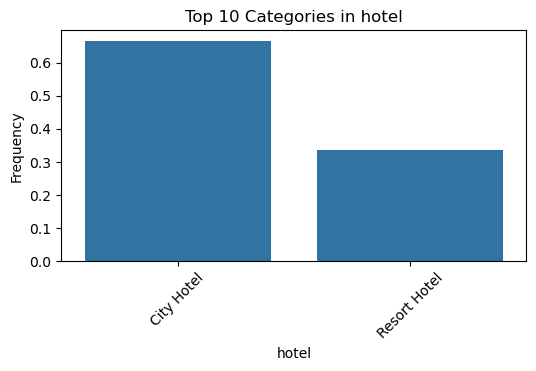


--- customer_type ---
Unique values: 4
customer_type
Transient          0.750591
Transient-Party    0.210436
Contract           0.034140
Group              0.004833
Name: proportion, dtype: float64


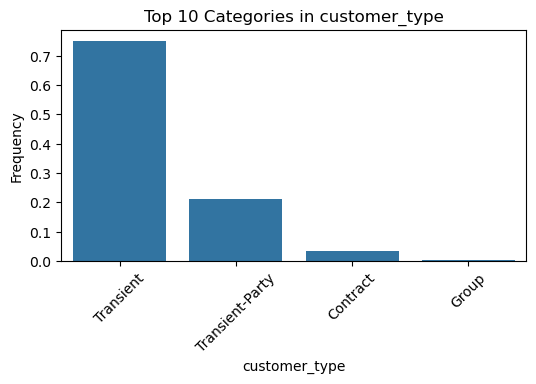


--- market_segment ---
Unique values: 8
market_segment
Online TA        0.473046
Offline TA/TO    0.202856
Groups           0.165935
Direct           0.105587
Corporate        0.044350
Complementary    0.006223
Aviation         0.001985
Undefined        0.000017
Name: proportion, dtype: float64


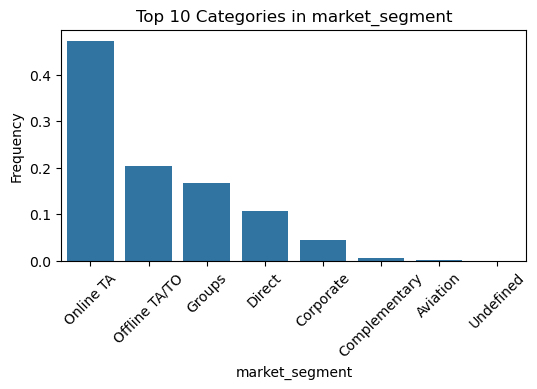


--- distribution_channel ---
Unique values: 5
distribution_channel
TA/TO        0.819750
Direct       0.122665
Corporate    0.055926
GDS          0.001617
Undefined    0.000042
Name: proportion, dtype: float64


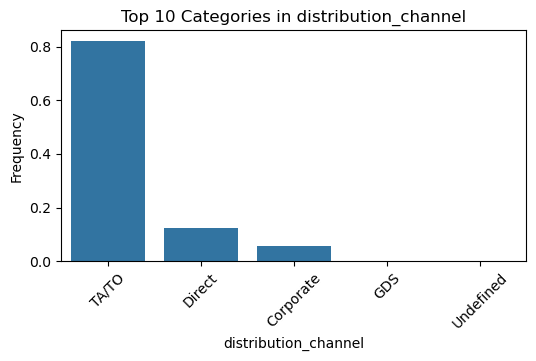


--- deposit_type ---
Unique values: 3
deposit_type
No Deposit    0.876464
Non Refund    0.122179
Refundable    0.001357
Name: proportion, dtype: float64


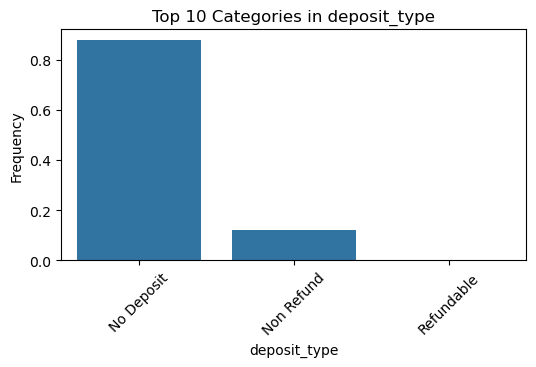


--- meal ---
Unique values: 5
meal
BB           0.773180
HB           0.121141
SC           0.089203
Undefined    0.009791
FB           0.006684
Name: proportion, dtype: float64


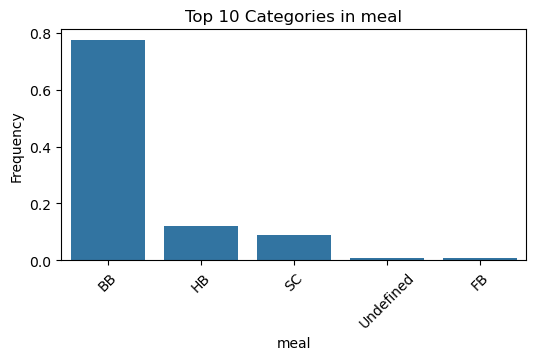


--- reserved_room_type ---
Unique values: 10
reserved_room_type
A    0.720278
D    0.160826
E    0.054737
F    0.024265
G    0.017539
B    0.009364
C    0.007806
H    0.005034
P    0.000101
L    0.000050
Name: proportion, dtype: float64


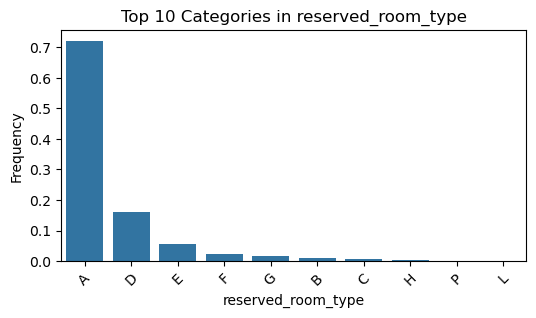


--- assigned_room_type ---
Unique values: 12
assigned_room_type
A    0.620261
D    0.212095
E    0.065382
F    0.031418
G    0.021384
C    0.019893
B    0.018117
H    0.005964
I    0.003040
K    0.002337
Name: proportion, dtype: float64


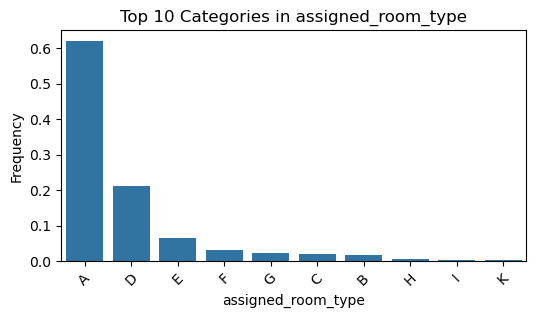


--- agent ---
count    103050.000000
mean         86.693382
std         110.774548
min           1.000000
25%           9.000000
50%          14.000000
75%         229.000000
max         535.000000
Name: agent, dtype: float64


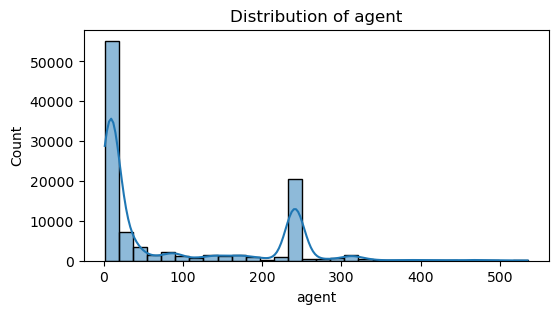


--- company ---
count    6797.000000
mean      189.266735
std       131.655015
min         6.000000
25%        62.000000
50%       179.000000
75%       270.000000
max       543.000000
Name: company, dtype: float64


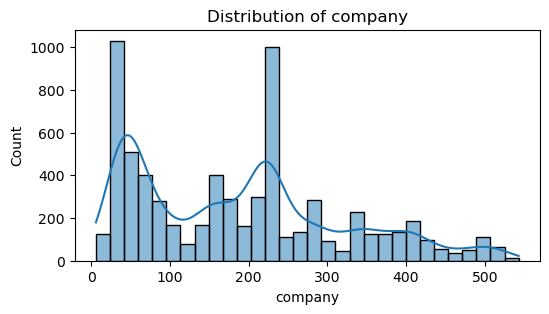


--- is_repeated_guest ---
count    119390.000000
mean          0.031912
std           0.175767
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: is_repeated_guest, dtype: float64


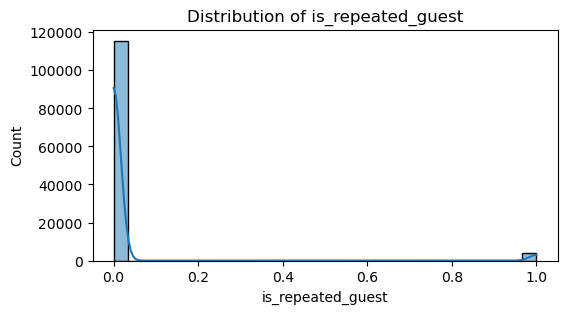

In [95]:
explore_dataset(df[categorical_features])

In [98]:
unique_room_types = set(df["reserved_room_type"].unique()) | set(df["assigned_room_type"].unique())
unique_room_types

{'A', 'B', 'C', 'D', 'E', 'F', 'G', 'H', 'I', 'K', 'L', 'P'}